
#**Default Credit Card Clients Prediction**

####Predicting Credit Card Clients Who Will Default on Their Next Month Payment

##**Loading Required Libraries**

In [1]:
#Importing Libraries
import pandas as pd   
import numpy as np   
import seaborn as sns  
import matplotlib.pyplot as plt  

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder 
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler  
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import  plot_roc_curve, plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN

##**Loading Data**

In [2]:
#Loading Data
df=pd.read_csv('https://raw.githubusercontent.com/dasunck/ml_foundation_capstone/main/dataset/default%20of%20credit%20card%20clients.csv',skiprows=1,index_col='ID')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


###Viewing Basic Information About Dataset

In [3]:
df.shape

(30000, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [5]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


##**Data Preprocessing**

In [6]:
#Rename Label Column with Shorter Name
df.rename(columns={'default payment next month' : 'IS_DEFAULT_CX'},inplace=True)
#Rename PAY_0 Column to make consistsnt naming
df.rename(columns={'PAY_0' : 'PAY_1'},inplace=True)

In [7]:
#Optimize Memory usage

#Categorical variables are already mapped to integers. Reducing memory size.

#Gender (1 = male; 2 = female).
print(df['SEX'].value_counts())
df['SEX'] = df['SEX'].astype('category')
print('*'*20)

#********************

#Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
print(df['EDUCATION'].value_counts())
df['EDUCATION'] = df['EDUCATION'].astype('category')
print('*'*20)

#Corrections for Values Outside Stated Range
#Education 0, 5, 6 values underfined - replacing those as others (4)
df['EDUCATION'].replace(0, 4, inplace=True)
df['EDUCATION'].replace(5, 4, inplace=True)
df['EDUCATION'].replace(6, 4, inplace=True)

#********************

#Marital status (1 = married; 2 = single; 3 = others).
print(df['MARRIAGE'].value_counts())
df['MARRIAGE'] = df['MARRIAGE'].astype('category')
print('*'*20)

#Corrections for Values Outside Stated Range
#Marriage type 0 underfined - replacting those as others (3)
df['MARRIAGE'].replace(0, 3, inplace=True)

#********************

#default payment (Yes = 1, No = 0)
print(df['IS_DEFAULT_CX'].value_counts())
df['IS_DEFAULT_CX'] = df['IS_DEFAULT_CX'].astype('int8')
print('*'*20)


#********************

#-2 can be considered as equal to dully pay (-1)
df['PAY_1'].replace(-2, -1, inplace=True)
df['PAY_2'].replace(-2, -1, inplace=True)
df['PAY_3'].replace(-2, -1, inplace=True)
df['PAY_4'].replace(-2, -1, inplace=True)
df['PAY_5'].replace(-2, -1, inplace=True)
df['PAY_6'].replace(-2, -1, inplace=True)
#Keeping PAY_1 to PAY_6 as int type - eventhough it is categroical variable, it is defined with ordinal meaning - 
#Therfore, these columns are ordinally encoded already

#PAY_1 to PAY_6: Indicates History of past repayment status for September,August,July,June,May,April months of year 2005 respectievely 
#The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 
#8 = payment delay for eight months; 9 = payment delay for nine months and above.

print(df['PAY_1'].value_counts())
df['PAY_1'] = df['PAY_1'].astype(pd.CategoricalDtype( categories=[-1,0,1,2,3,4,5,6,7,8,9],ordered=True))
df['PAY_2'] = df['PAY_2'].astype(pd.CategoricalDtype( categories=[-1,0,1,2,3,4,5,6,7,8,9],ordered=True))
df['PAY_3'] = df['PAY_3'].astype(pd.CategoricalDtype( categories=[-1,0,1,2,3,4,5,6,7,8,9],ordered=True))
df['PAY_4'] = df['PAY_4'].astype(pd.CategoricalDtype( categories=[-1,0,1,2,3,4,5,6,7,8,9],ordered=True))
df['PAY_5'] = df['PAY_5'].astype(pd.CategoricalDtype( categories=[-1,0,1,2,3,4,5,6,7,8,9],ordered=True))
df['PAY_6'] = df['PAY_6'].astype(pd.CategoricalDtype( categories=[-1,0,1,2,3,4,5,6,7,8,9],ordered=True))
print('*'*20)
#0 and -2 exists as values for 
#As per Clarifications provided in https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/discussion
#-2: No consumption; 0: The use of revolving credit;

#********************

#Age (year) - Min/Max values acceptable
print("Min Age:",str(df['AGE'].min()))
print("Max Age:",str(df['AGE'].max()))
df['AGE'] = df['AGE'].astype('int8')
print('*'*20)

#*********************

#BILL_AMT1 to BILL_AMT6: Amount of bill statement (NT dollar) in September,August,July,June,May,April months of year 2005 respectievely
#PAY_AMT1 to PAY_AMT6  : Amount of previous payment (NT dollar) paid in September,August,July,June,May,April months of year 2005 respectievely; 


2    18112
1    11888
Name: SEX, dtype: int64
********************
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
********************
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
********************
0    23364
1     6636
Name: IS_DEFAULT_CX, dtype: int64
********************
 0    14737
-1     8445
 1     3688
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64
********************
Min Age: 21
Max Age: 79
********************


In [8]:
#Corrections for Values Outside Stated Range
#Education 0, 5, 6 values underfined - replacing those as others (4)
df['EDUCATION'].replace(0, 4, inplace=True)
df['EDUCATION'].replace(5, 4, inplace=True)
df['EDUCATION'].replace(6, 4, inplace=True)

#Marriage type 0 underfined - replacting those as others (3)
df['EDUCATION'].replace(0, 3, inplace=True)

#-2 can be considered as equal to dully pay (-1)
df['PAY_1'].replace(-2, -1, inplace=True)
df['PAY_2'].replace(-2, -1, inplace=True)
df['PAY_3'].replace(-2, -1, inplace=True)
df['PAY_4'].replace(-2, -1, inplace=True)
df['PAY_5'].replace(-2, -1, inplace=True)
df['PAY_6'].replace(-2, -1, inplace=True)
#Keeping PAY_1 to PAY_6 as int type - eventhough it is categroical variable, it is defined with ordinal meaning - 
#Therfore, these columns are ordinally encoded already

In [9]:
#Check For Null Values
df.isnull().sum()

LIMIT_BAL        0
SEX              0
EDUCATION        0
MARRIAGE         0
AGE              0
PAY_1            0
PAY_2            0
PAY_3            0
PAY_4            0
PAY_5            0
PAY_6            0
BILL_AMT1        0
BILL_AMT2        0
BILL_AMT3        0
BILL_AMT4        0
BILL_AMT5        0
BILL_AMT6        0
PAY_AMT1         0
PAY_AMT2         0
PAY_AMT3         0
PAY_AMT4         0
PAY_AMT5         0
PAY_AMT6         0
IS_DEFAULT_CX    0
dtype: int64

In [10]:
#No Null Values Observed in this case

# Drop rows with missing values (Only Requires If Exists)
df.dropna(how='any', axis=0, inplace=True)

In [11]:
# identify duplicates
duplicates = df.loc[df.duplicated()]
duplicates

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IS_DEFAULT_CX
ID,,,,,,,,,,,,,,,,,,,,,
1981,150000,2,1,1,38,1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,1
4586,150000,2,1,1,31,1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
6023,210000,2,1,2,39,1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
6467,210000,2,2,1,49,1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
7320,500000,1,1,1,43,1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,1
8321,360000,1,2,1,41,1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,1
10251,50000,1,2,2,26,1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
13107,360000,2,1,1,49,1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
14295,20000,1,2,2,24,2,2,4,4,4,...,1650,1650,1650,0,0,0,0,0,0,1


In [12]:
# Remove duplicates
df.drop_duplicates(keep='first', inplace=True)

#Check descriptive statistics after Removing duplicates
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
LIMIT_BAL,29964.0,NaN,NaN,NaN,167441.585903,129762.280262,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,29964.0,2.0,2.0,18090.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION,29964.0,4.0,2.0,14019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MARRIAGE,29964.0,3.0,2.0,15945.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,29964.0,NaN,NaN,NaN,35.487652,9.219449,21.0,28.00,34.0,41.00,79.0
PAY_1,29964.0,10.0,0.0,14737.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_2,29964.0,10.0,0.0,15730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_3,29964.0,10.0,0.0,15764.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_4,29964.0,10.0,0.0,16455.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_5,29964.0,9.0,0.0,16947.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# save as picke file (binary)
df.to_pickle('creditcard_client_data_cleaned.pkl')

##**Exploratory Data Analysis**

In [14]:
#Load Preproceddes Data File
df = pd.read_pickle('creditcard_client_data_cleaned.pkl')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IS_DEFAULT_CX
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [15]:
df['IS_DEFAULT_CX'].value_counts()

0    23334
1     6630
Name: IS_DEFAULT_CX, dtype: int64

In [16]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
df_cat = df[categorical_features]
df_cat['IS_DEFAULT_CX'] = df['IS_DEFAULT_CX']
df_cat['IS_DEFAULT_CX_DES']=df_cat['IS_DEFAULT_CX']

df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}}, inplace = True) 
df_cat.replace({'EDUCATION' : {1 : 'graduate_school', 2 : 'university', 3 : 'high_school', 4 : 'others'}}, inplace = True)
df_cat.replace({'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)           
df_cat.replace({'IS_DEFAULT_CX_DES' : {0 : 'NOT DEFAULTER', 1 : 'DEFAULTER'}}, inplace = True)  


df_cat['SEX'] = df_cat['SEX'].astype('category')  
df_cat['EDUCATION'] = df_cat['EDUCATION'].astype('category')  
df_cat['MARRIAGE'] = df_cat['MARRIAGE'].astype('category')  
df_cat['IS_DEFAULT_CX'] = df_cat['IS_DEFAULT_CX'].astype('category')  
df_cat['IS_DEFAULT_CX_DES'] = df_cat['IS_DEFAULT_CX_DES'].astype('category')  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

<Figure size 1008x432 with 0 Axes>

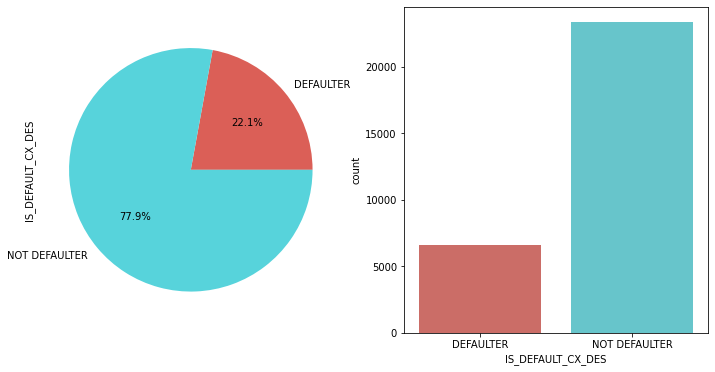

In [17]:
plt.figure(figsize=(14,6))
fig, axes = plt.subplots(ncols=2,figsize=(12,6))
modes_hue = sorted(pd.concat([df_cat['IS_DEFAULT_CX_DES'] for df in (df_cat)], ignore_index=True).unique())
colors = sns.color_palette('hls', len(modes_hue))
palette = {IS_DEFAULT_CX_DES: color for IS_DEFAULT_CX_DES, color in zip(modes_hue, colors)}
df_cat['IS_DEFAULT_CX_DES'].value_counts().sort_index().plot(kind="pie",autopct='%1.1f%%',ax = axes[0],colors=[palette[v] for v in modes_hue],subplots=True)
sns.countplot(x = 'IS_DEFAULT_CX_DES', data = df_cat, palette=palette,order=sorted(modes_hue) )

<Figure size 1512x432 with 0 Axes>

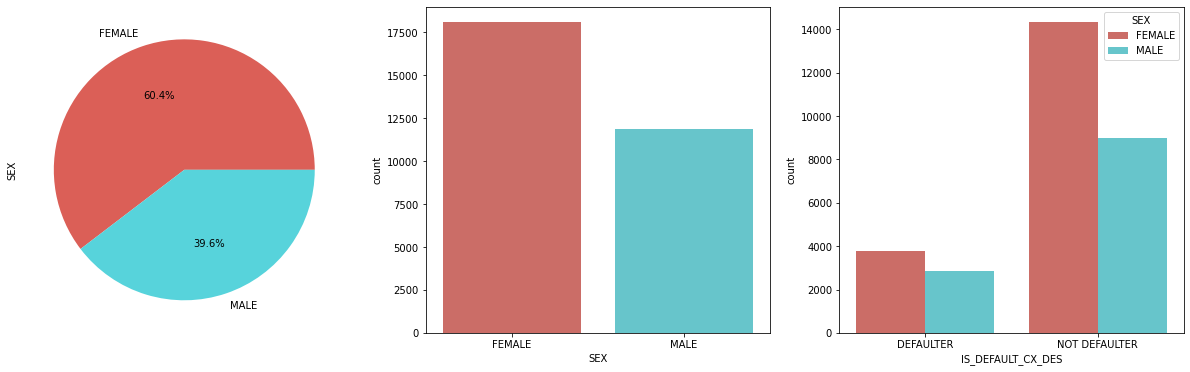

<Figure size 1512x432 with 0 Axes>

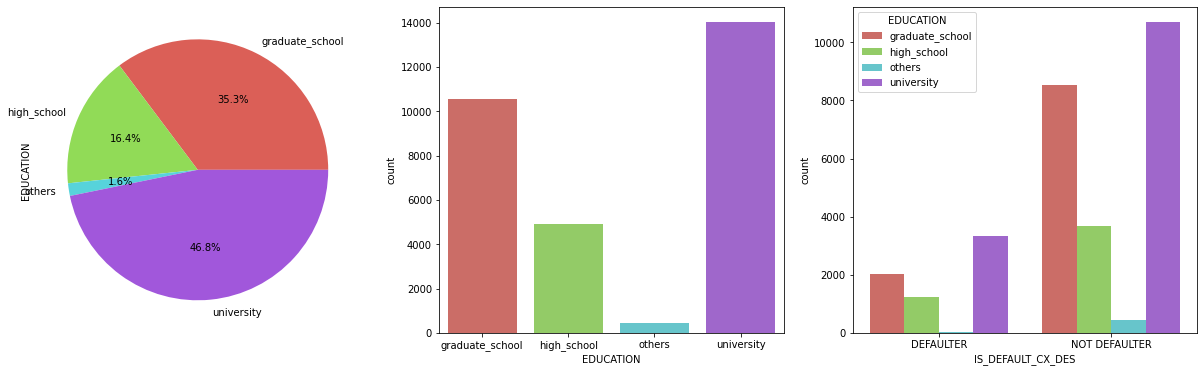

<Figure size 1512x432 with 0 Axes>

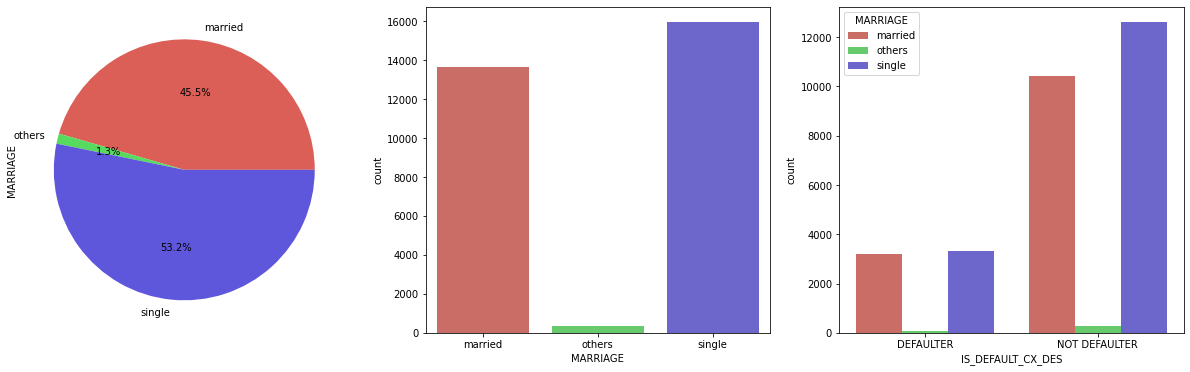

In [18]:
for col in categorical_features:
  plt.figure(figsize=(21,6))
  fig, axes = plt.subplots(ncols=3,figsize=(21,6))
  modes_hue = sorted(pd.concat([df_cat[col] for df in (df_cat)], ignore_index=True).unique())
  colors = sns.color_palette('hls', len(modes_hue))
  palette = {mode: color for mode, color in zip(modes_hue, colors)}

  df_cat[col].value_counts().sort_index().plot(kind="pie",autopct='%1.1f%%',colors=colors,ax = axes[0],subplots=True )
  sns.countplot(x = col,ax = axes[1], data = df_cat,palette=palette)                               
  sns.countplot(x = 'IS_DEFAULT_CX_DES', hue = col , data = df_cat,palette=palette)

In [19]:
##Observations
#This is Imbalanced Dataset - Resampeling Technique need to be followed
#There are more females credit card holders than males.
#Majority have graduate school and university education
#Single presentage is high.

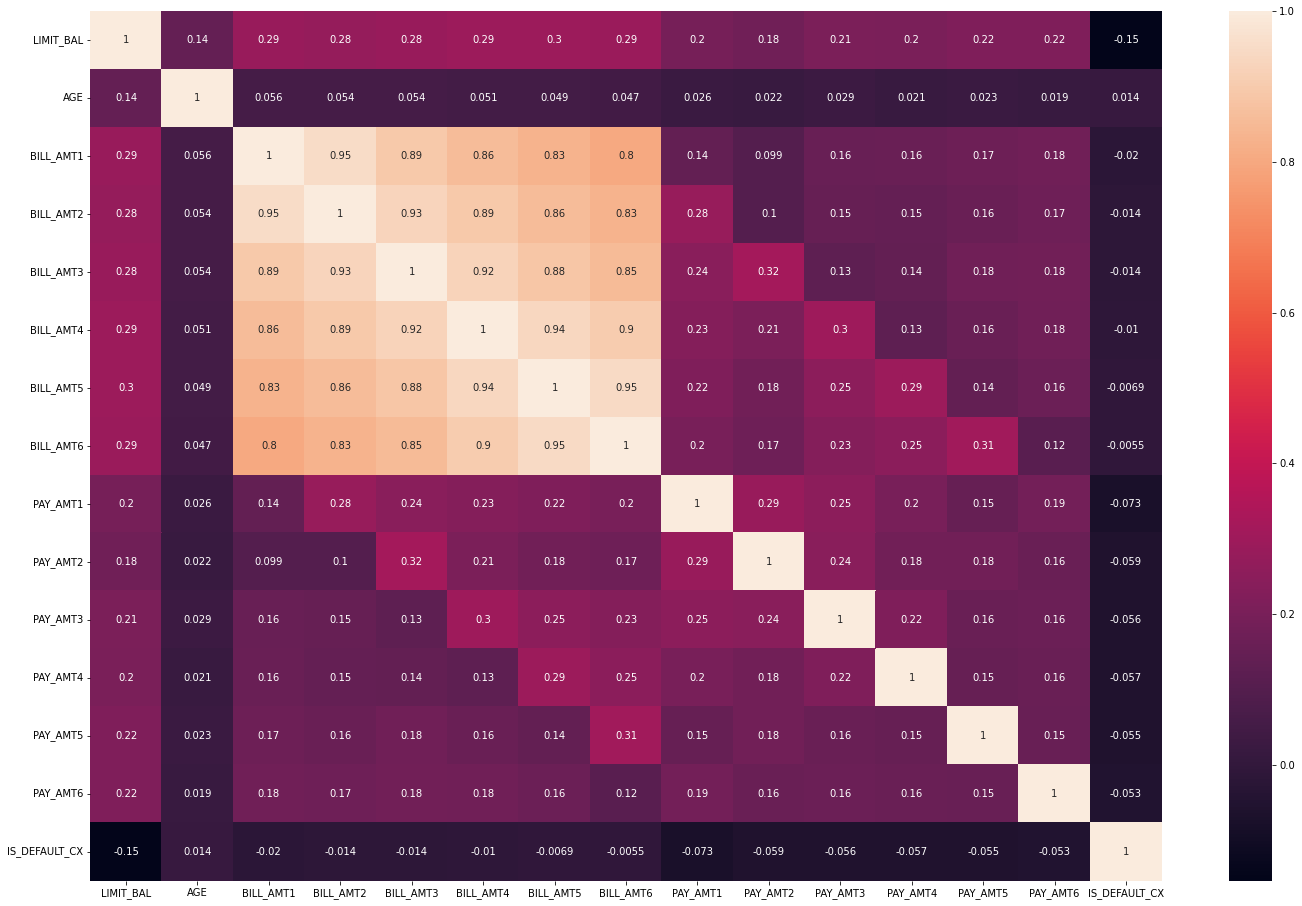

In [20]:
#Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize = [24, 16], clear = True)
sns.heatmap(correlation_matrix,annot = True)

In [21]:
#Observation
#Neumerical columns show very low negative correlation
#Bill_AMT variables of 6 months are highly correlated

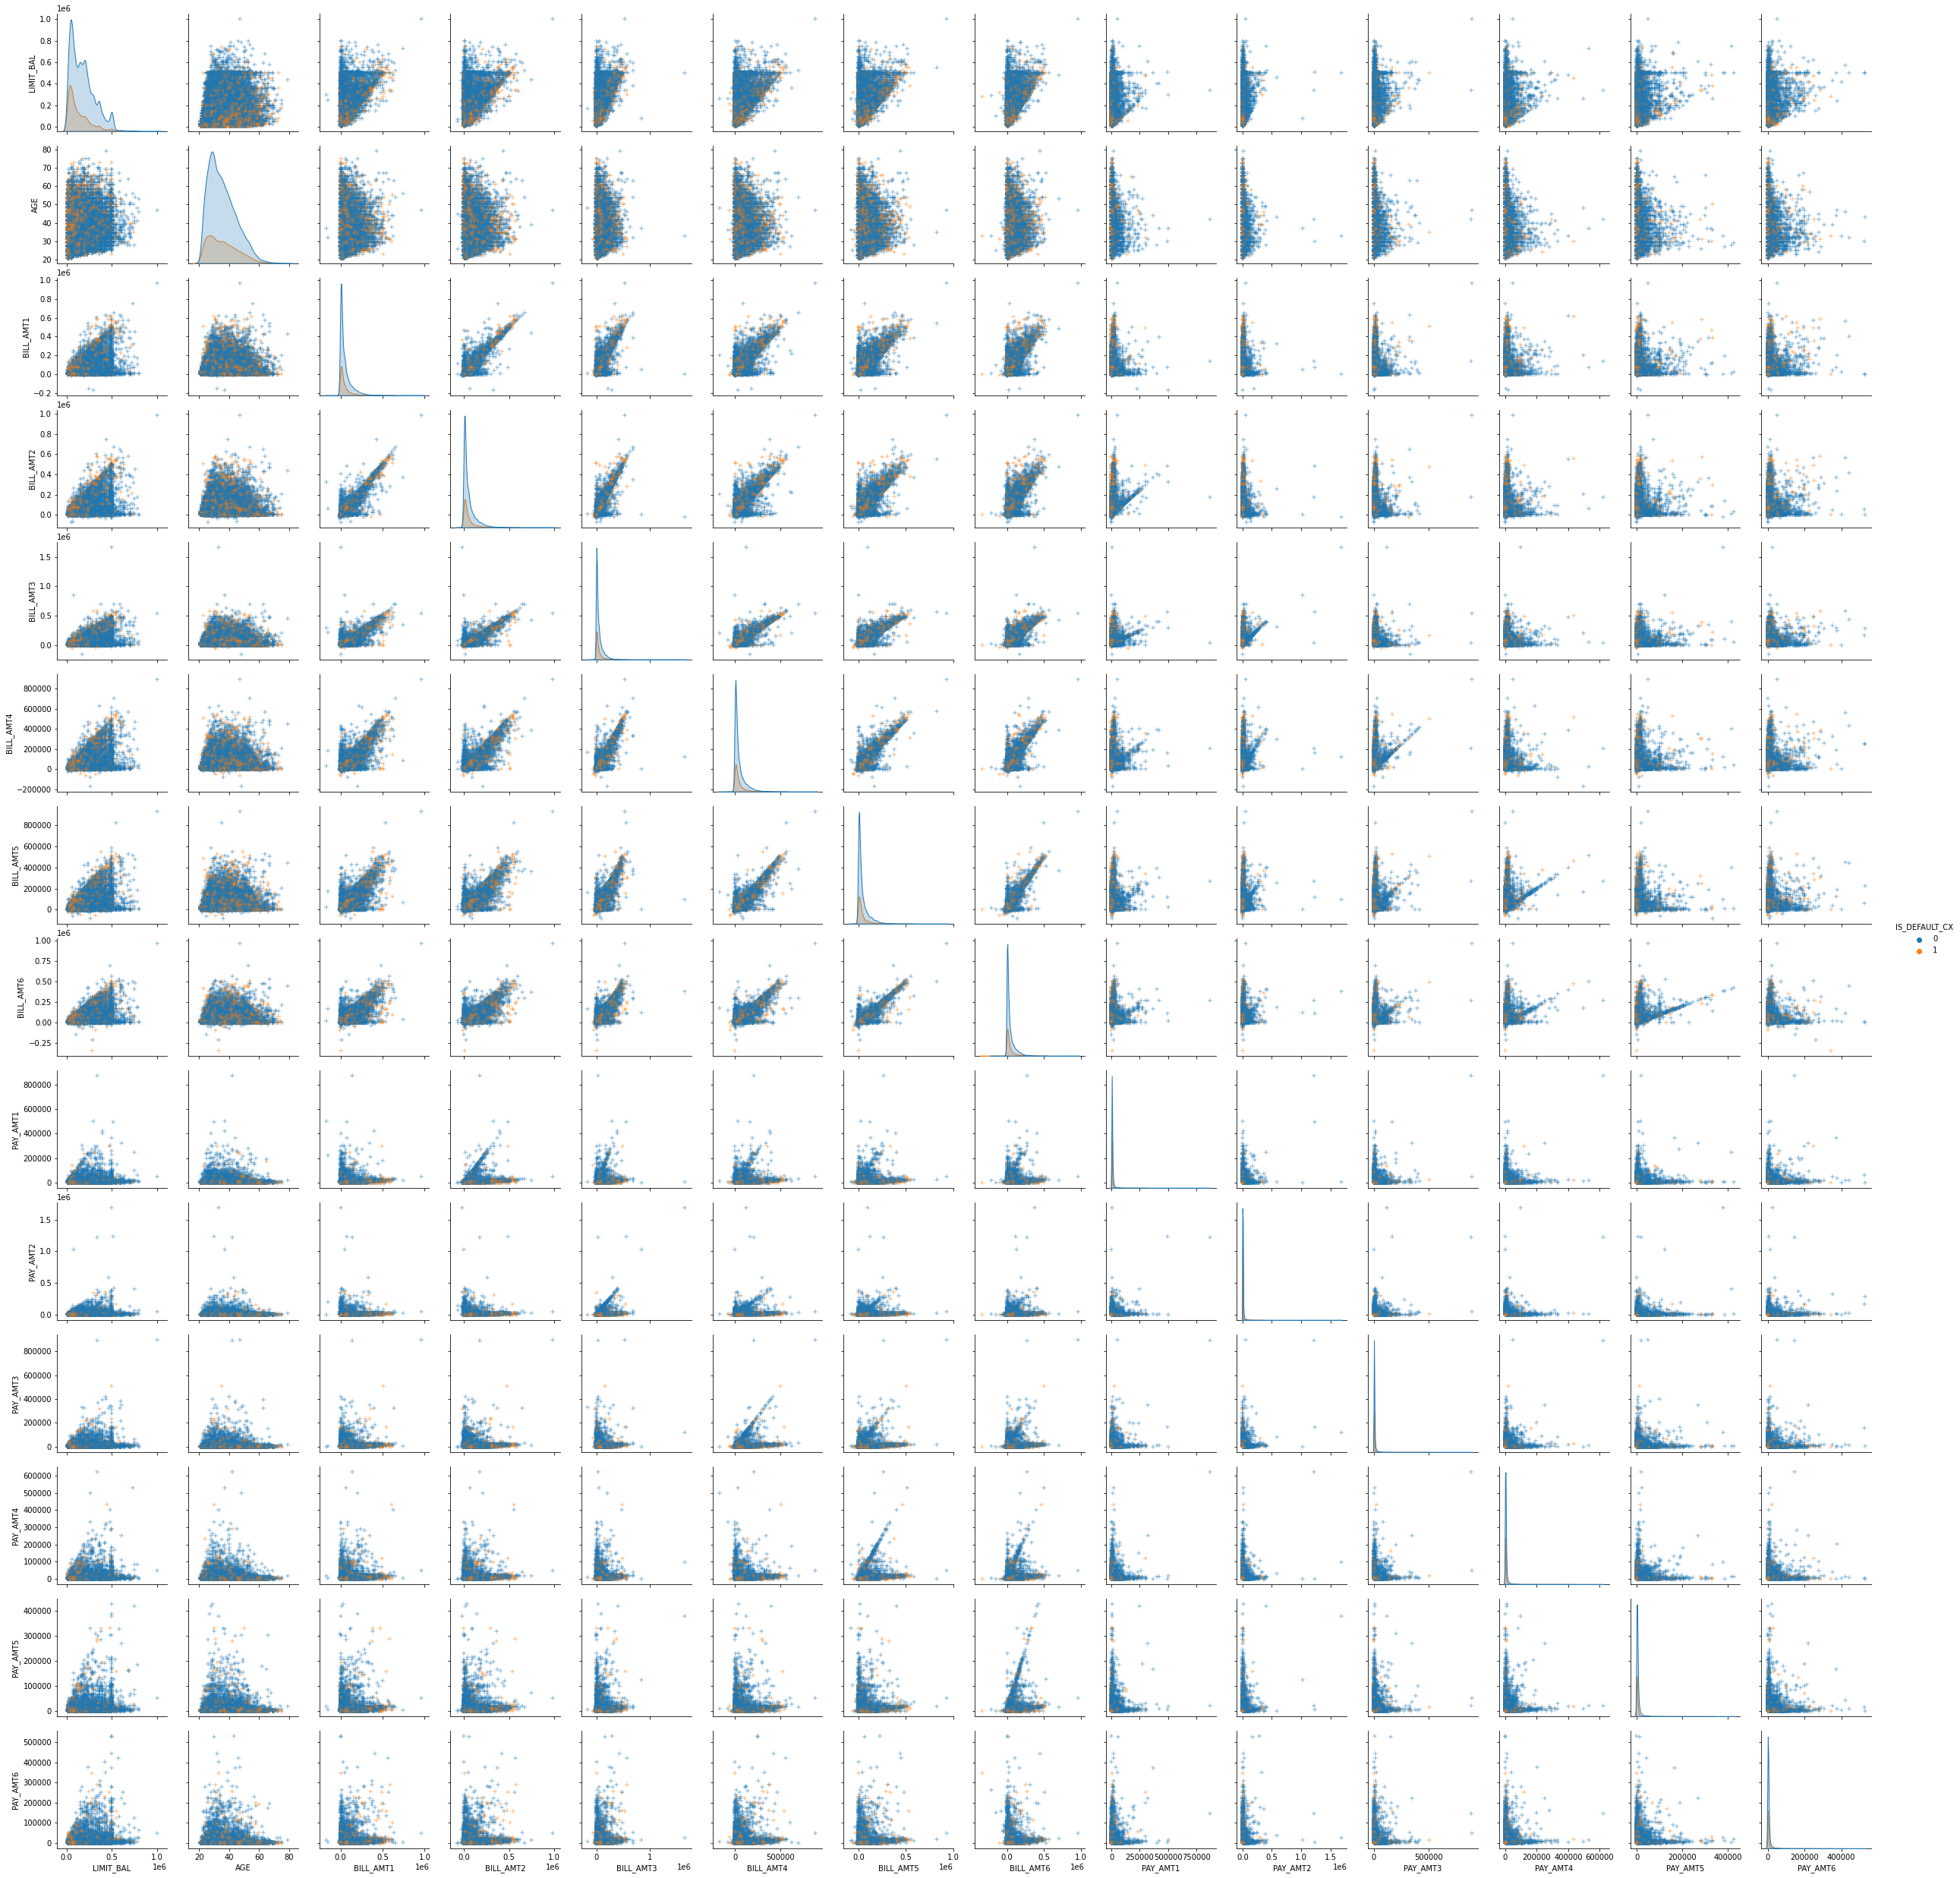

In [25]:
g = sns.pairplot(df, hue='IS_DEFAULT_CX', markers='+')
plt.show()

##**Feature Engineering and Preparing for Machine Learning Model training**

In [26]:
#Encoding Categorical variables  
lbe = LabelEncoder()
lbe.fit_transform(df['SEX'])
df['SEX'] = lbe.fit_transform(df['SEX'])
print(df['SEX'].value_counts())
print('*'*10)
lbe.fit_transform(df['MARRIAGE'])
df['MARRIAGE'] = lbe.fit_transform(df['MARRIAGE'])
print(df['MARRIAGE'].value_counts())
print('*'*10)
lbe.fit_transform(df['EDUCATION'])
df['EDUCATION'] = lbe.fit_transform(df['EDUCATION'])
print(df['EDUCATION'].value_counts())
print('*'*10)

#Converting PAY_1 to PAY_6 back to int as it has ordinal (ranking) meaning of clients payment status
df['PAY_1'] = df['PAY_1'].astype('int8')
df['PAY_2'] = df['PAY_2'].astype('int8')
df['PAY_3'] = df['PAY_3'].astype('int8')
df['PAY_4'] = df['PAY_4'].astype('int8')
df['PAY_5'] = df['PAY_5'].astype('int8')
df['PAY_6'] = df['PAY_6'].astype('int8')

1    18090
0    11874
Name: SEX, dtype: int64
**********
1    15945
0    13642
2      377
Name: MARRIAGE, dtype: int64
**********
1    14019
0    10563
2     4914
3      468
Name: EDUCATION, dtype: int64
**********


In [27]:
#Get Column Names
print(df.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'IS_DEFAULT_CX'],
      dtype='object')


In [28]:
# independent variables (features)
X = df[{'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'}]

# dependent variable (label)
y = df['IS_DEFAULT_CX']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, shuffle = True, random_state = 21)

In [30]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [31]:
X_test.columns

Index(['PAY_AMT3', 'PAY_AMT6', 'SEX', 'BILL_AMT2', 'PAY_AMT4', 'PAY_3', 'AGE',
       'MARRIAGE', 'PAY_AMT2', 'PAY_6', 'PAY_AMT1', 'PAY_5', 'PAY_AMT5',
       'PAY_4', 'BILL_AMT1', 'BILL_AMT5', 'LIMIT_BAL', 'PAY_1', 'PAY_2',
       'EDUCATION', 'BILL_AMT4', 'BILL_AMT6', 'BILL_AMT3'],
      dtype='object')

In [32]:
#Functions Used in Model Evaluations and Related Visualizations 

#Getting Performece Scores
def model_train(model_id, model,resampeling_method, x_train, y_train, x_test, y_test,feature_vector):
    
    #Feature Selection
    x_train=x_train[feature_vector]
    x_test=x_test[feature_vector]

    # Custom variable to keep feature names stored
    model.feature_names = list(feature_vector)
    # train Model
    model.fit(x_train, y_train)

    # Make Predictions
    y_pred = model.predict(x_test)
    y_pred_prob = model.predict_proba(x_test)[:, 1]

    test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})

    #Plot Confusion Matrix 
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, linewidths = 2, cbar = True, linecolor = "white", fmt = ".0f")
    plt.xlabel("Predictions")
    plt.ylabel("Actuals")
    plt.title(("Confusion Matrix for "+str(model) + " Classifier with " +resampeling_method), size = 14)
    plt.show()
        
    #Evaluate
    accuracy = accuracy_score(test_result['y_act'], test_result['y_pred']) 
    precision = precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
    recall = recall_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
    f1_score_val = f1_score(test_result['y_act'], test_result['y_pred'])
    f1_score_weighted_val = f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
    roc_auc = roc_auc_score(test_result['y_act'], test_result['y_pred_prob'])



    performence_scores = {
                  "Model ID" :model_id,
                  "Model" :model,
                  "Resampeling method" :resampeling_method,
                  "Feature count " : len(feature_vector),
                  "Accuracy score" : accuracy,
                  "Precision score" : precision,
                  "Recall score" : recall,
                  "F1 score" : f1_score_val,
                  "F1 score weighted" : f1_score_weighted_val,
                  "ROC AUC score" : roc_auc}
    [print(key,':',value) for key, value in performence_scores.items()]
    print('*'*50)
    return performence_scores




##**Model Building and Evaluating**

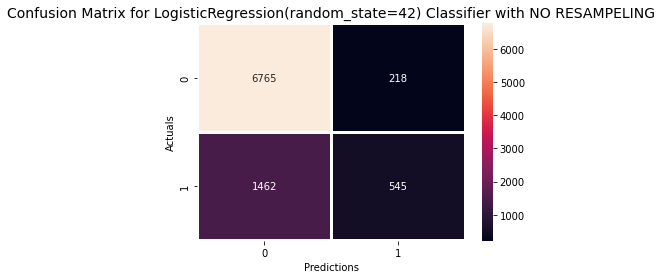

Model ID : lgr_ns_01
Model : LogisticRegression(random_state=42)
Resampeling method : NO RESAMPELING
Feature count  : 23
Accuracy score : 0.8131256952169077
Precision score : 0.7142857142857143
Recall score : 0.2715495764823119
F1 score : 0.3935018050541516
F1 score weighted : 0.7788053717874226
ROC AUC score : 0.7274414959356416
**************************************************


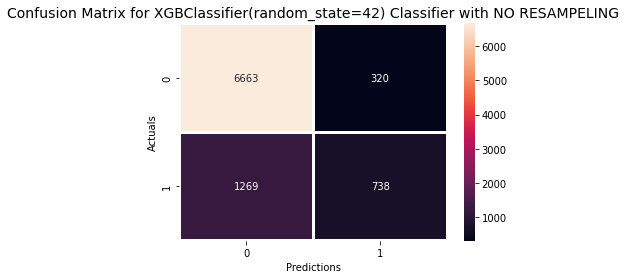

Model ID : xgb_ns_01
Model : XGBClassifier(random_state=42)
Resampeling method : NO RESAMPELING
Feature count  : 23
Accuracy score : 0.8232480533926585
Precision score : 0.6975425330812854
Recall score : 0.36771300448430494
F1 score : 0.48156606851549755
F1 score weighted : 0.8015077782569946
ROC AUC score : 0.7894925757842681
**************************************************


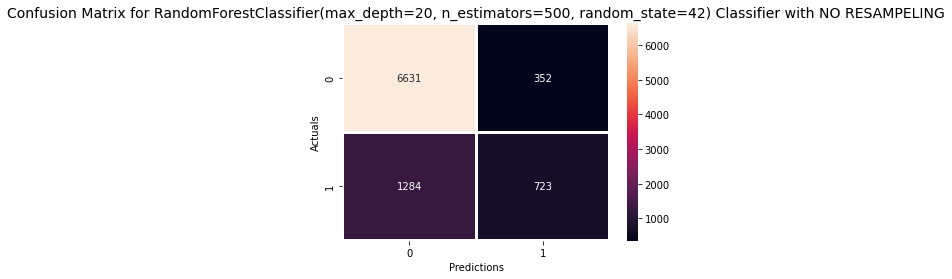

Model ID : rf_ns_01
Model : RandomForestClassifier(max_depth=20, n_estimators=500, random_state=42)
Resampeling method : NO RESAMPELING
Feature count  : 23
Accuracy score : 0.818020022246941
Precision score : 0.6725581395348837
Recall score : 0.3602391629297459
F1 score : 0.46917585983127835
F1 score weighted : 0.7961967735309122
ROC AUC score : 0.7824049308731198
**************************************************


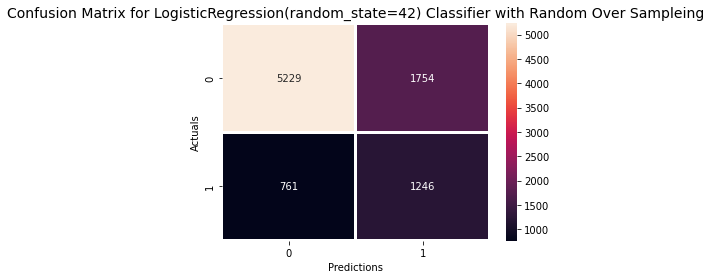

Model ID : lgr_rovs_01
Model : LogisticRegression(random_state=42)
Resampeling method : Random Over Sampleing
Feature count  : 23
Accuracy score : 0.7202447163515017
Precision score : 0.41533333333333333
Recall score : 0.6208271051320379
F1 score : 0.4977032154983024
F1 score weighted : 0.7372788418696723
ROC AUC score : 0.727211882855088
**************************************************


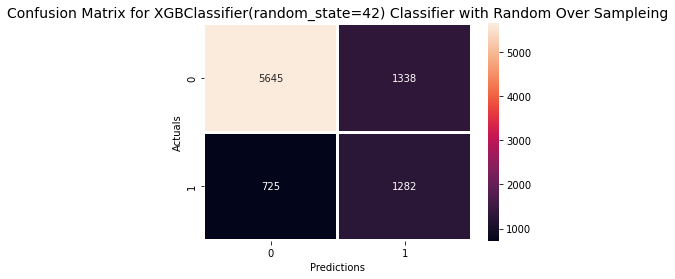

Model ID : xgb_rovs_01
Model : XGBClassifier(random_state=42)
Resampeling method : Random Over Sampleing
Feature count  : 23
Accuracy score : 0.7705228031145718
Precision score : 0.48931297709923666
Recall score : 0.6387643248629796
F1 score : 0.5541387508104604
F1 score weighted : 0.7804564078522653
ROC AUC score : 0.7867556991743276
**************************************************


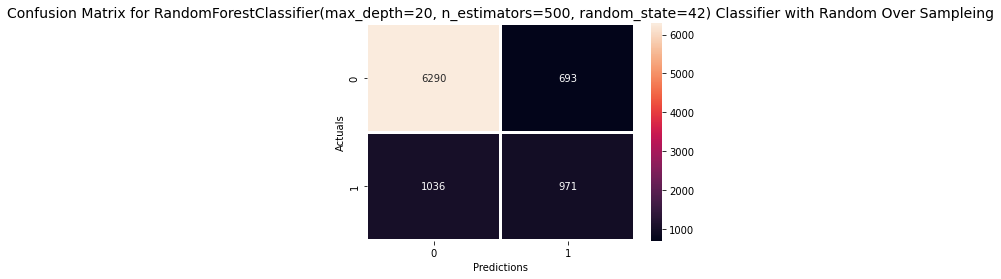

Model ID : rf_rovs_01
Model : RandomForestClassifier(max_depth=20, n_estimators=500, random_state=42)
Resampeling method : Random Over Sampleing
Feature count  : 23
Accuracy score : 0.8076751946607341
Precision score : 0.5835336538461539
Recall score : 0.4838066766317887
F1 score : 0.529011168618905
F1 score weighted : 0.8009953595267382
ROC AUC score : 0.7795266331551441
**************************************************


In [33]:
models_scores = []
feature_vector={'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'}

models_scores.append(model_train('lgr_ns_01',LogisticRegression(random_state=42),'NO RESAMPELING', X_train, y_train, X_test, y_test,feature_vector))
models_scores.append(model_train('xgb_ns_01',XGBClassifier(random_state=42),'NO RESAMPELING', X_train, y_train, X_test, y_test,feature_vector))
models_scores.append(model_train('rf_ns_01',RandomForestClassifier(n_estimators=500, max_depth=20,random_state=42),'NO RESAMPELING', X_train, y_train, X_test, y_test,feature_vector))


#Applying Random Oversampeling
rovs = RandomOverSampler(sampling_strategy = "auto", random_state = 42)
X_rovs_train, y_rovs_train = rovs.fit_resample(X_train, y_train)

#Running Same models with Random Oversampeling
models_scores.append(model_train('lgr_rovs_01',LogisticRegression(random_state=42),'Random Over Sampleing', X_rovs_train, y_rovs_train, X_test, y_test,feature_vector))
models_scores.append(model_train('xgb_rovs_01',XGBClassifier(random_state=42),'Random Over Sampleing', X_rovs_train, y_rovs_train, X_test, y_test,feature_vector))
models_scores.append(model_train('rf_rovs_01',RandomForestClassifier(n_estimators=500, max_depth=20,random_state=42),'Random Over Sampleing', X_rovs_train, y_rovs_train, X_test, y_test,feature_vector))


In [34]:
scores_df = pd.DataFrame(models_scores)
scores_df.set_index('Model ID',inplace=True)
scores_df

,Model,Resampeling method,Feature count,Accuracy score,Precision score,Recall score,F1 score,F1 score weighted,ROC AUC score
Model ID,,,,,,,,,
lgr_ns_01,LogisticRegression(random_state=42),NO RESAMPELING,23,0.813126,0.714286,0.271550,0.393502,0.778805,0.727441
xgb_ns_01,XGBClassifier(random_state=42),NO RESAMPELING,23,0.823248,0.697543,0.367713,0.481566,0.801508,0.789493
rf_ns_01,"(DecisionTreeClassifier(max_depth=20, max_feat...",NO RESAMPELING,23,0.818020,0.672558,0.360239,0.469176,0.796197,0.782405
lgr_rovs_01,LogisticRegression(random_state=42),Random Over Sampleing,23,0.720245,0.415333,0.620827,0.497703,0.737279,0.727212
xgb_rovs_01,XGBClassifier(random_state=42),Random Over Sampleing,23,0.770523,0.489313,0.638764,0.554139,0.780456,0.786756
rf_rovs_01,"(DecisionTreeClassifier(max_depth=20, max_feat...",Random Over Sampleing,23,0.807675,0.583534,0.483807,0.529011,0.800995,0.779527


##**Hyperparameter Tuning and Selecting Best Model**

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    1.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    7.4s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:   18.4s
[Parallel(n_jobs=20)]: Done 480 out of 480 | elapsed:   21.1s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.7s
[Parallel(n_jobs=20)]: Done 480 out of 480 | elapsed:    0.8s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.7s
[Parallel(n_jobs=20)]: Done 480 out of 480 | elapsed: 

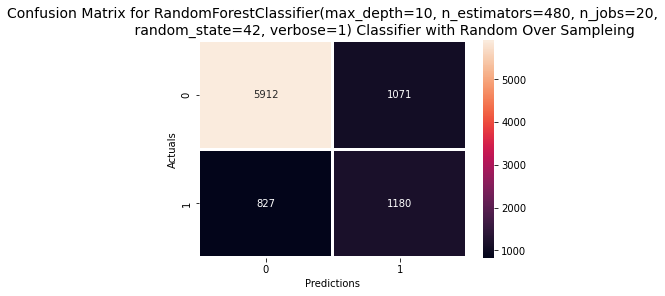

Model ID : rf_rovs_test
Model : RandomForestClassifier(max_depth=10, n_estimators=480, n_jobs=20,
                       random_state=42, verbose=1)
Resampeling method : Random Over Sampleing
Feature count  : 23
Accuracy score : 0.7888765294771969
Precision score : 0.5242114615726344
Recall score : 0.587942202291978
F1 score : 0.5542508219821514
F1 score weighted : 0.7930485650863495
ROC AUC score : 0.7851351716793029
**************************************************


In [35]:
#manually testing with differnt hyperparameters
#test_model_score=model_train('xgb_rovs_02',XGBClassifier(n_estimators =180, max_depth = 10, gamma = 0.5,reg_alpha = 1,min_child_weight=8,colsample_bytree=0.5,reg_lambda=1,random_state=42),'Random Over Sampleing', X_rovs_train, y_rovs_train, X_test, y_test,feature_vector)
test_model_score=model_train('rf_rovs_test',RandomForestClassifier(n_estimators=480, max_depth=10, n_jobs=20, verbose=1,random_state=42),'Random Over Sampleing', X_rovs_train, y_rovs_train, X_test, y_test,feature_vector)

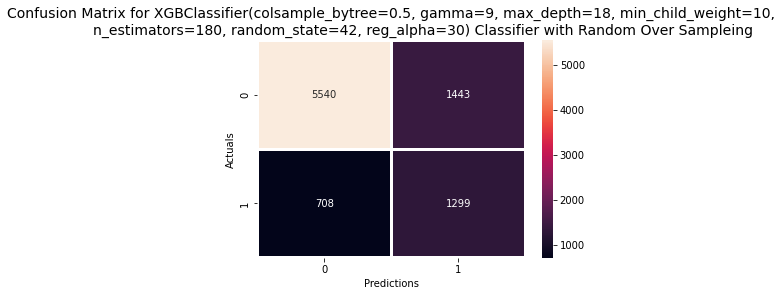

Model ID : xgb_rovs_02
Model : XGBClassifier(colsample_bytree=0.5, gamma=9, max_depth=18, min_child_weight=10,
              n_estimators=180, random_state=42, reg_alpha=30)
Resampeling method : Random Over Sampleing
Feature count  : 23
Accuracy score : 0.760734149054505
Precision score : 0.4737417943107221
Recall score : 0.6472346786248132
F1 score : 0.5470625394819962
F1 score weighted : 0.7726038968464931
ROC AUC score : 0.7905712863348607
**************************************************


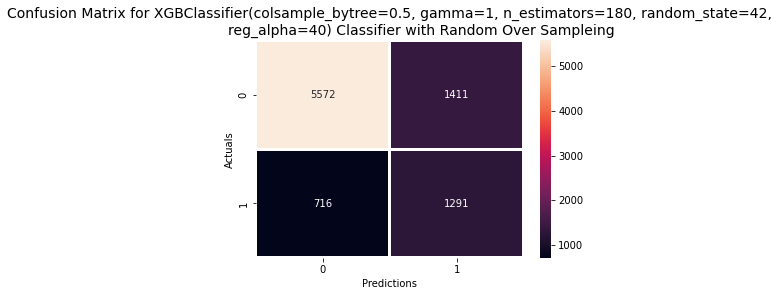

Model ID : xgb_rovs_03
Model : XGBClassifier(colsample_bytree=0.5, gamma=1, n_estimators=180, random_state=42,
              reg_alpha=40)
Resampeling method : Random Over Sampleing
Feature count  : 23
Accuracy score : 0.7634037819799777
Precision score : 0.4777942264988897
Recall score : 0.643248629795715
F1 score : 0.5483117434699512
F1 score weighted : 0.7746681152453284
ROC AUC score : 0.7881771882329933
**************************************************


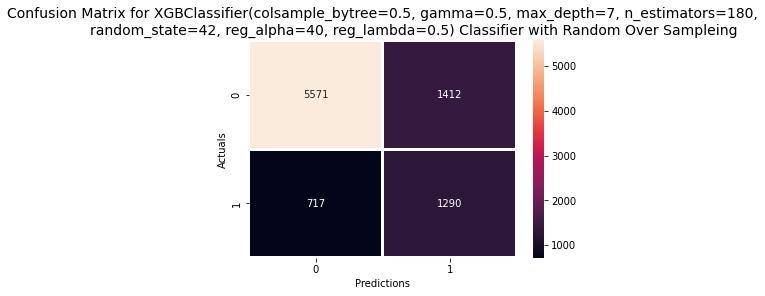

Model ID : xgb_rovs_04
Model : XGBClassifier(colsample_bytree=0.5, gamma=0.5, max_depth=7, n_estimators=180,
              random_state=42, reg_alpha=40, reg_lambda=0.5)
Resampeling method : Random Over Sampleing
Feature count  : 23
Accuracy score : 0.7631813125695217
Precision score : 0.4774241302738712
Recall score : 0.6427503736920778
F1 score : 0.5478870248460396
F1 score weighted : 0.7744562375915864
ROC AUC score : 0.7892524381762499
**************************************************


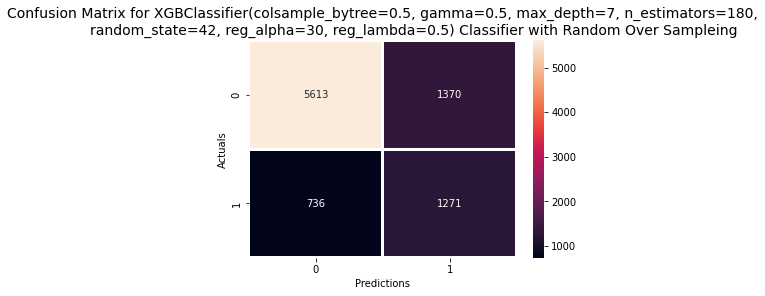

Model ID : xgb_rovs_05
Model : XGBClassifier(colsample_bytree=0.5, gamma=0.5, max_depth=7, n_estimators=180,
              random_state=42, reg_alpha=30, reg_lambda=0.5)
Resampeling method : Random Over Sampleing
Feature count  : 23
Accuracy score : 0.7657397107897664
Precision score : 0.4812570995834911
Recall score : 0.6332835077229696
F1 score : 0.5469018932874354
F1 score weighted : 0.7761464896898924
ROC AUC score : 0.7877010157988498
**************************************************


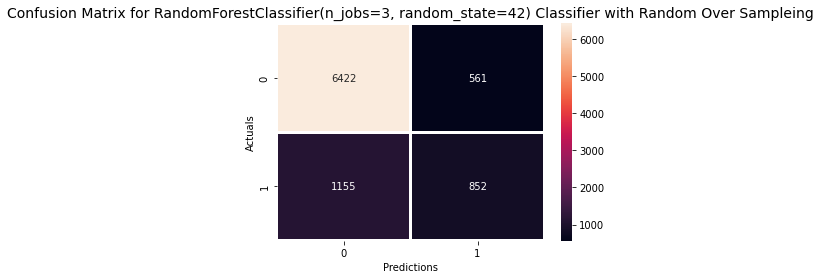

Model ID : rf_rovs_02
Model : RandomForestClassifier(n_jobs=3, random_state=42)
Resampeling method : Random Over Sampleing
Feature count  : 23
Accuracy score : 0.8091212458286986
Precision score : 0.6029723991507431
Recall score : 0.42451420029895365
F1 score : 0.49824561403508777
F1 score weighted : 0.7964385449162394
ROC AUC score : 0.771252856160534
**************************************************


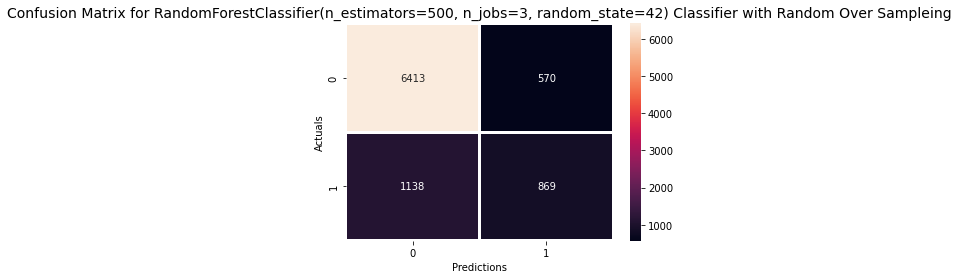

Model ID : rf_rovs_03
Model : RandomForestClassifier(n_estimators=500, n_jobs=3, random_state=42)
Resampeling method : Random Over Sampleing
Feature count  : 23
Accuracy score : 0.8100111234705228
Precision score : 0.6038915913829048
Recall score : 0.43298455406078723
F1 score : 0.5043528728961114
F1 score weighted : 0.798065761813287
ROC AUC score : 0.7740426051423484
**************************************************


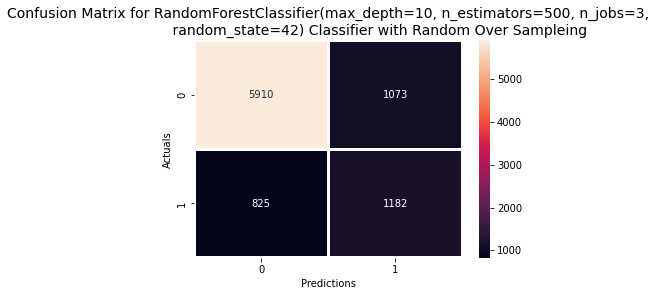

Model ID : rf_rovs_04
Model : RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=3,
                       random_state=42)
Resampeling method : Random Over Sampleing
Feature count  : 23
Accuracy score : 0.7888765294771969
Precision score : 0.5241685144124169
Recall score : 0.5889387144992526
F1 score : 0.5546691694040357
F1 score weighted : 0.793110632502284
ROC AUC score : 0.7851551504433039
**************************************************


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    1.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    7.4s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:   18.4s
[Parallel(n_jobs=20)]: Done 480 out of 480 | elapsed:   21.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done 480 out of 480 | elapsed:    0.5s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done 480 out of 480 | elapsed: 

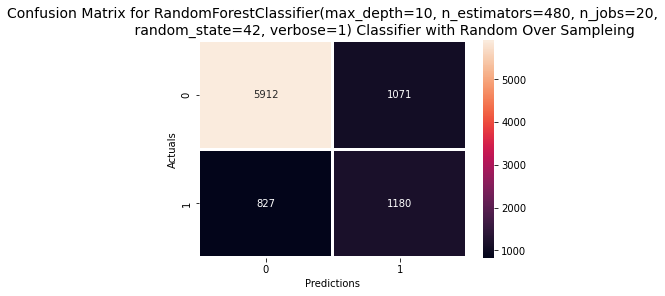

Model ID : rf_rovs_05
Model : RandomForestClassifier(max_depth=10, n_estimators=480, n_jobs=20,
                       random_state=42, verbose=1)
Resampeling method : Random Over Sampleing
Feature count  : 23
Accuracy score : 0.7888765294771969
Precision score : 0.5242114615726344
Recall score : 0.587942202291978
F1 score : 0.5542508219821514
F1 score weighted : 0.7930485650863495
ROC AUC score : 0.7851351716793029
**************************************************


In [36]:
#XGBoost and Decison Three Classifiers Give Heigher F1 Scores

#Hyperparameter Tuning
models_scores = []

feature_vector={'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'}

models_scores.append(model_train('xgb_rovs_02',XGBClassifier(n_estimators =180, max_depth = 18, gamma = 9,reg_alpha = 30,min_child_weight=10,colsample_bytree=0.5,reg_lambda=1,random_state=42),'Random Over Sampleing', X_rovs_train, y_rovs_train, X_test, y_test,feature_vector))
models_scores.append(model_train('xgb_rovs_03',XGBClassifier(n_estimators =180, max_depth = 3, gamma = 1,reg_alpha = 40,min_child_weight=1,colsample_bytree=0.5,reg_lambda=1,random_state=42),'Random Over Sampleing', X_rovs_train, y_rovs_train, X_test, y_test,feature_vector))
models_scores.append(model_train('xgb_rovs_04',XGBClassifier(n_estimators =180, max_depth = 7, gamma = 0.5,reg_alpha = 40,min_child_weight=1,colsample_bytree=0.5,reg_lambda=0.5,random_state=42),'Random Over Sampleing', X_rovs_train, y_rovs_train, X_test, y_test,feature_vector))
models_scores.append(model_train('xgb_rovs_05',XGBClassifier(n_estimators =180, max_depth = 7, gamma = 0.5,reg_alpha = 30,min_child_weight=1,colsample_bytree=0.5,reg_lambda=0.5,random_state=42),'Random Over Sampleing', X_rovs_train, y_rovs_train, X_test, y_test,feature_vector))

models_scores.append(model_train('rf_rovs_02',RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=3, verbose=0,random_state=42),'Random Over Sampleing', X_rovs_train, y_rovs_train, X_test, y_test,feature_vector))
models_scores.append(model_train('rf_rovs_03',RandomForestClassifier(n_estimators=500, max_depth=None, n_jobs=3, verbose=0,random_state=42),'Random Over Sampleing', X_rovs_train, y_rovs_train, X_test, y_test,feature_vector))
models_scores.append(model_train('rf_rovs_04',RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=3, verbose=0,random_state=42),'Random Over Sampleing', X_rovs_train, y_rovs_train, X_test, y_test,feature_vector))
models_scores.append(model_train('rf_rovs_05',RandomForestClassifier(n_estimators=480, max_depth=10, n_jobs=20, verbose=1,random_state=42),'Random Over Sampleing', X_rovs_train, y_rovs_train, X_test, y_test,feature_vector))

In [37]:
scores_df = pd.DataFrame(models_scores)
scores_df.set_index('Model ID',inplace=True)
scores_df

,Model,Resampeling method,Feature count,Accuracy score,Precision score,Recall score,F1 score,F1 score weighted,ROC AUC score
Model ID,,,,,,,,,
xgb_rovs_02,"XGBClassifier(colsample_bytree=0.5, gamma=9, m...",Random Over Sampleing,23,0.760734,0.473742,0.647235,0.547063,0.772604,0.790571
xgb_rovs_03,"XGBClassifier(colsample_bytree=0.5, gamma=1, n...",Random Over Sampleing,23,0.763404,0.477794,0.643249,0.548312,0.774668,0.788177
xgb_rovs_04,"XGBClassifier(colsample_bytree=0.5, gamma=0.5,...",Random Over Sampleing,23,0.763181,0.477424,0.642750,0.547887,0.774456,0.789252
xgb_rovs_05,"XGBClassifier(colsample_bytree=0.5, gamma=0.5,...",Random Over Sampleing,23,0.765740,0.481257,0.633284,0.546902,0.776146,0.787701
rf_rovs_02,"(DecisionTreeClassifier(max_features='auto', r...",Random Over Sampleing,23,0.809121,0.602972,0.424514,0.498246,0.796439,0.771253
rf_rovs_03,"(DecisionTreeClassifier(max_features='auto', r...",Random Over Sampleing,23,0.810011,0.603892,0.432985,0.504353,0.798066,0.774043
rf_rovs_04,"(DecisionTreeClassifier(max_depth=10, max_feat...",Random Over Sampleing,23,0.788877,0.524169,0.588939,0.554669,0.793111,0.785155
rf_rovs_05,"(DecisionTreeClassifier(max_depth=10, max_feat...",Random Over Sampleing,23,0.788877,0.524211,0.587942,0.554251,0.793049,0.785135


In [38]:
# Select best model based on f scores (through manual observation)
best_model_row = scores_df.query("`Model ID`=='rf_rovs_05'")
best_model=best_model_row['Model'].values[0]

##**Saving Best Model**

In [39]:
#save best model
import joblib

save_file = 'model_default_ccc_predict.joblib'
joblib.dump(best_model, open(save_file, 'wb'))

In [40]:
# loading from file
best_model_loaded = joblib.load(save_file)
print(best_model_loaded)
#print(best_model_loaded.feature_names)

RandomForestClassifier(max_depth=10, n_estimators=480, n_jobs=20,
                       random_state=42, verbose=1)
